In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!unzip /content/gdrive/MyDrive/Nsp/archive.zip


Archive:  /content/gdrive/MyDrive/Nsp/archive.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tumor_dataset/no/28

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import shutil
import math
import imutils

In [ ]:
ROOT_DIR = "/content/brain_tumor_dataset"
num_of_images = {}

for dir in os.listdir(ROOT_DIR):
  num_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

num_of_images

{'no': 98, 'yes': 155}

In [ ]:
if not os.path.exists("./train"):
  os.mkdir("./train")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./train/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir) ) ,
                                size= (math.floor(70/100*num_of_images[dir])-5) , replace=False ):

      O = os.path.join(ROOT_DIR,dir,img)
      D = os.path.join('./train', dir)
      shutil.copy(O,D)
      os.remove(O)
else:
  print("Train Folder exsist")

In [ ]:
if not os.path.exists("./val"):
  os.mkdir("./val")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./val/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir) ) ,
                                size= (math.floor(15/100*num_of_images[dir])-5) , replace=False ):

      O = os.path.join(ROOT_DIR,dir,img)
      D = os.path.join('./val', dir)
      shutil.copy(O,D)
      os.remove(O)
else:
  print("Train Folder exsist")

In [ ]:
if not os.path.exists("./test"):
  os.mkdir("./test")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./test/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir) ) ,
                                size= (math.floor(15/100*num_of_images[dir])-5) , replace=False ):

      O = os.path.join(ROOT_DIR,dir,img)
      D = os.path.join('./test', dir)
      shutil.copy(O,D)
      os.remove(O)
else:
  print("Train Folder exsist")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.preprocessing import image
import keras

In [ ]:
base_model = MobileNet(input_shape=(224,224,3), include_top= False)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(base_model.output)
x = Dense(units=2 , activation='sigmoid', name = 'predictions' )(x)

# creating our model.
model = Model(base_model.input, x)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']  )

In [ ]:
train_datagen = image.ImageDataGenerator(
     zoom_range = 0.2, shear_range = 0.2 , rescale = 1./255 , horizontal_flip=True
)

val_datagen = image.ImageDataGenerator(rescale = 1./255)

test_datagen = image.ImageDataGenerator(rescale = 1./255)

In [ ]:
train_data = train_datagen.flow_from_directory(directory= "/content/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )

Found 166 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'no': 0, 'yes': 1}

In [ ]:
val_data = val_datagen.flow_from_directory(directory= "/content/val",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )

Found 27 images belonging to 2 classes.


In [ ]:
test_data = test_datagen.flow_from_directory(directory= "/content/test", target_size=(224,224), batch_size=32)

Found 27 images belonging to 2 classes.


In [ ]:
t_img , label = train_data.next()

In [ ]:

def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

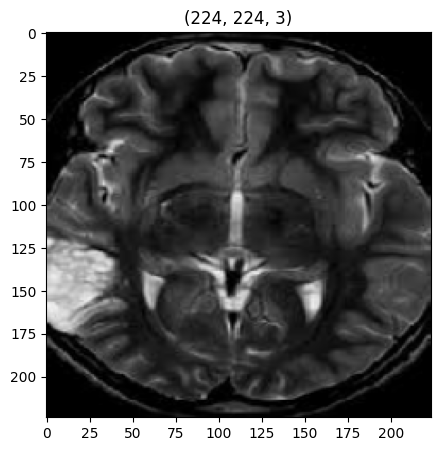

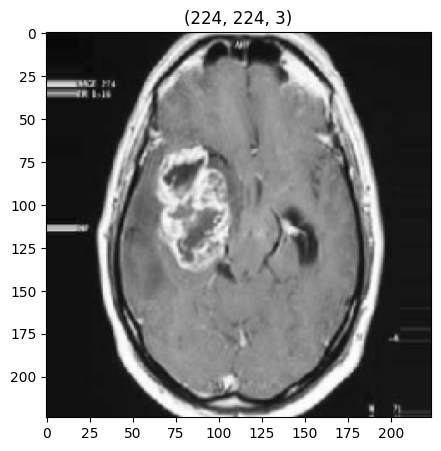

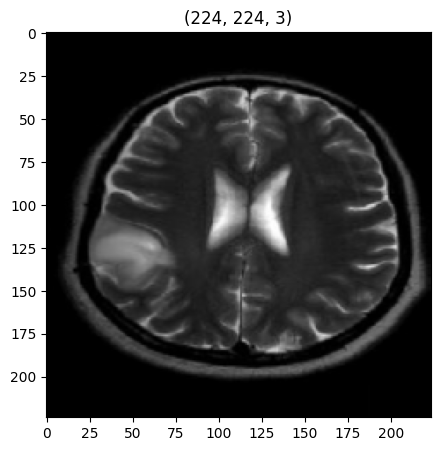

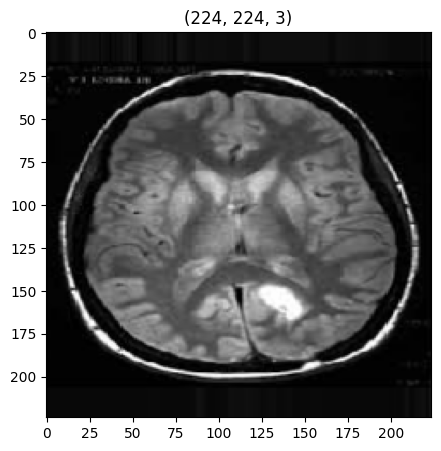

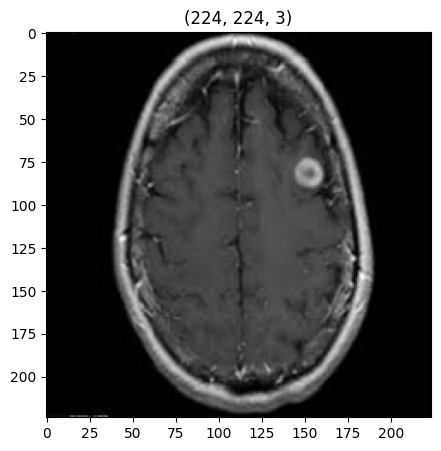

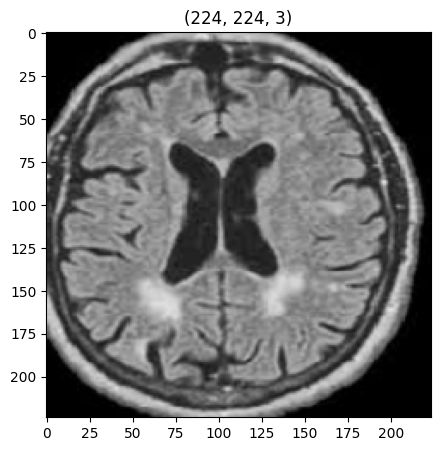

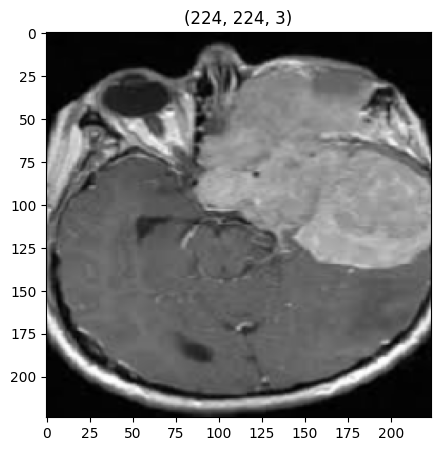

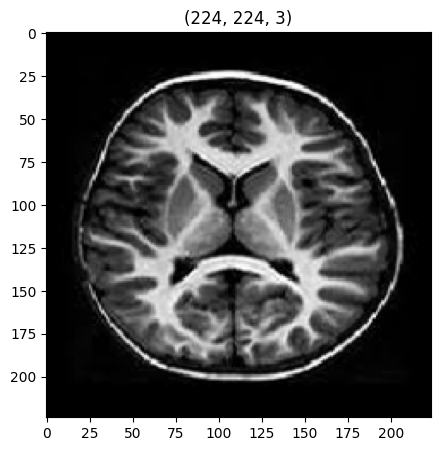

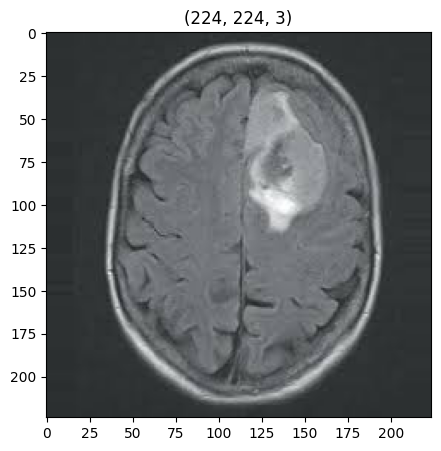

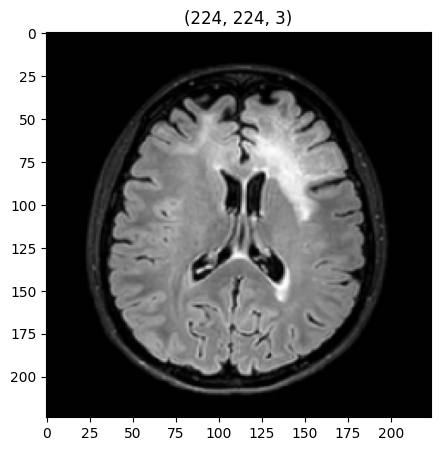

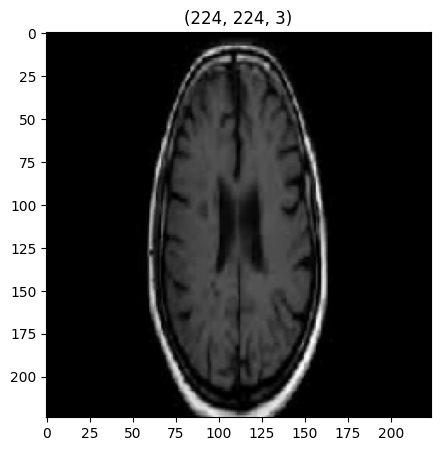

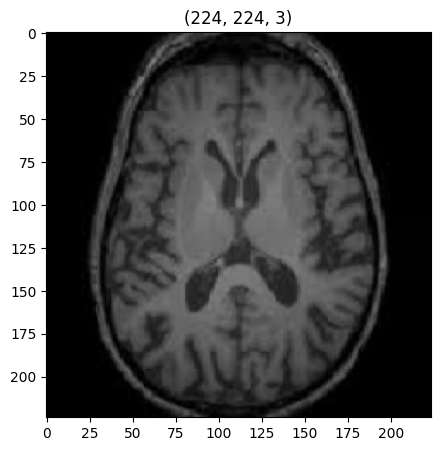

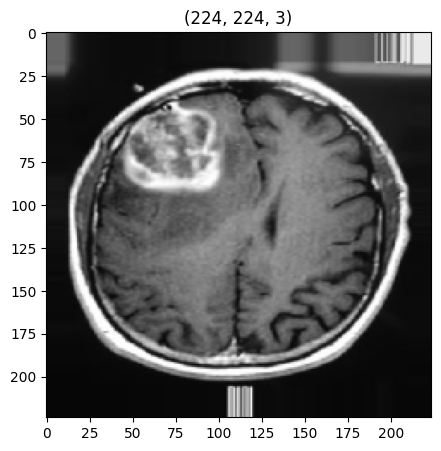

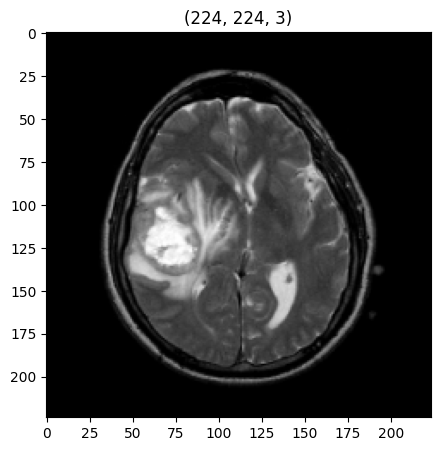

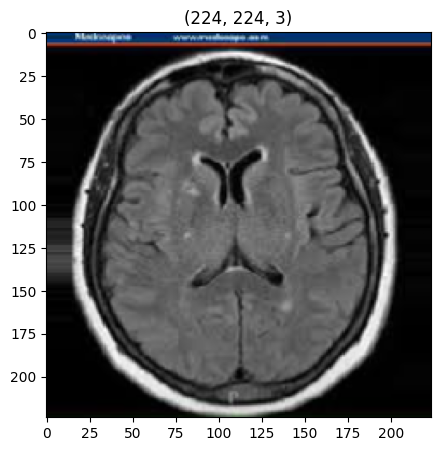

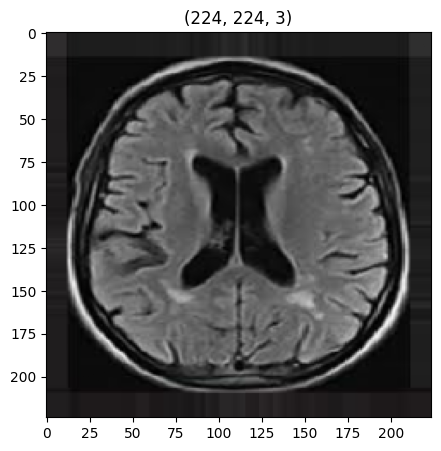

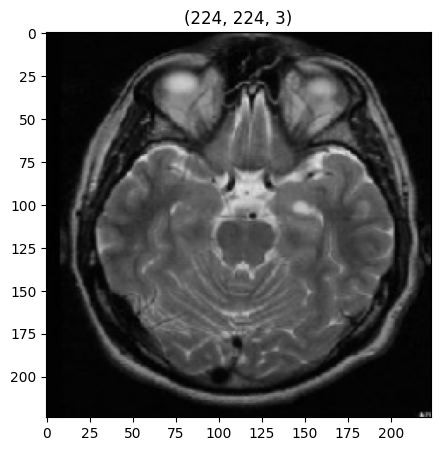

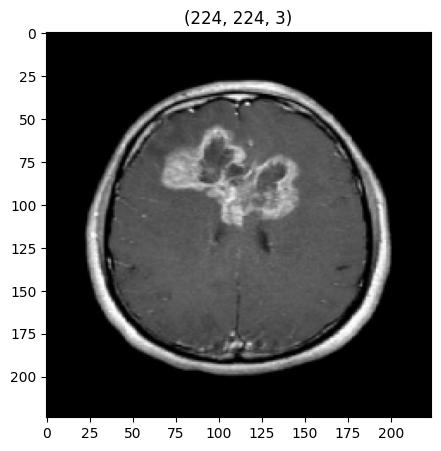

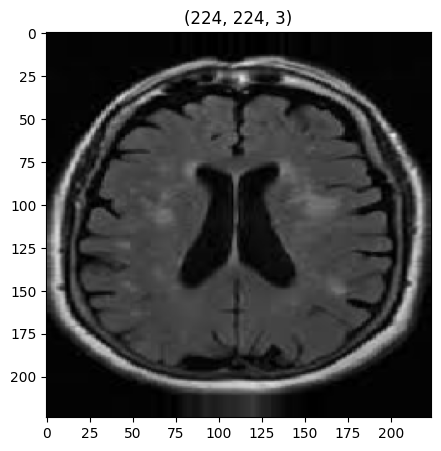

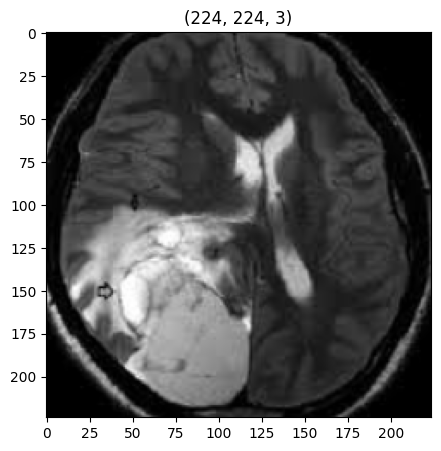

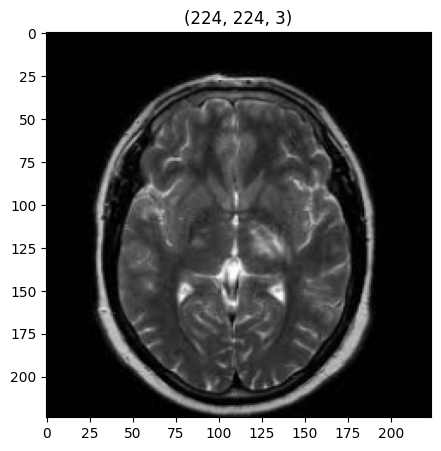

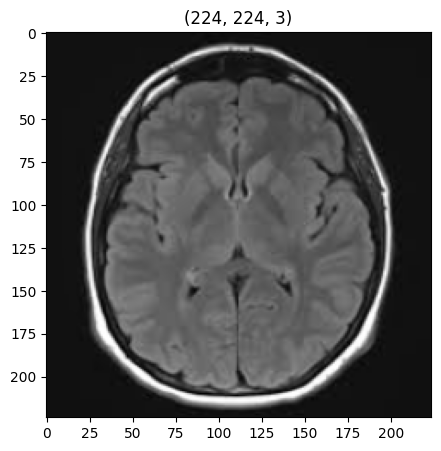

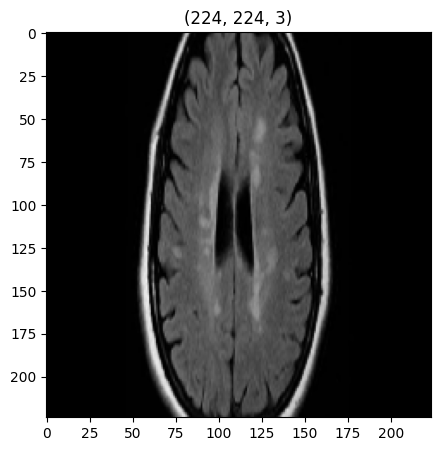

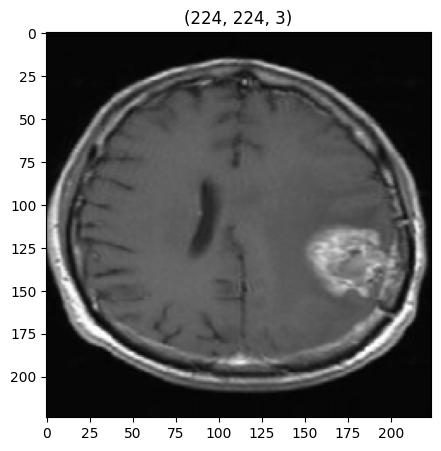

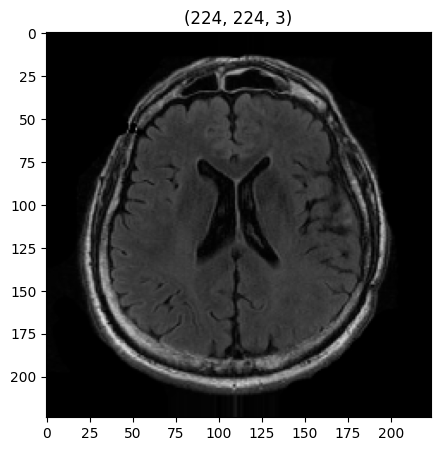

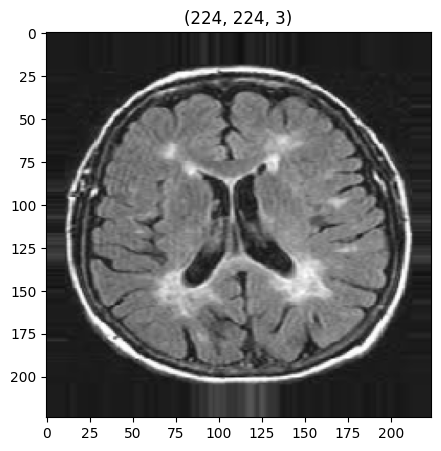

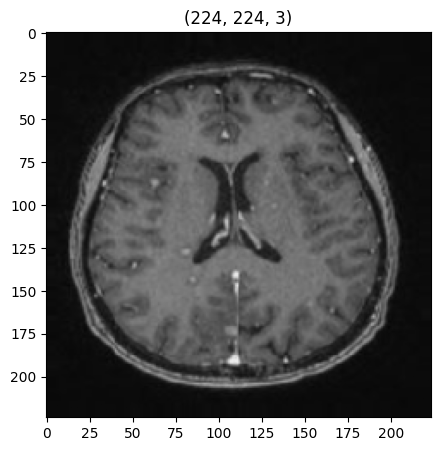

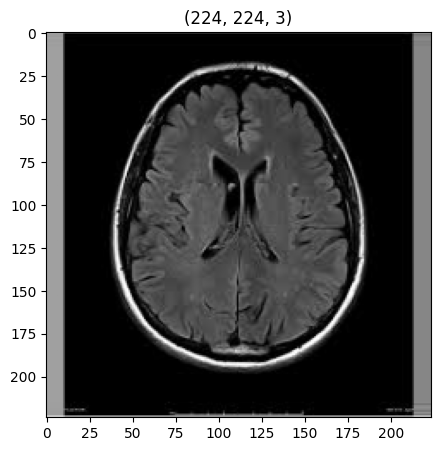

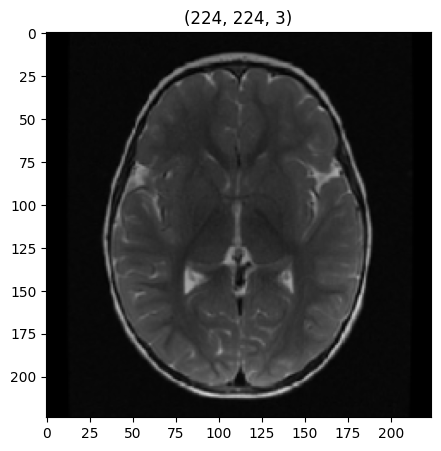

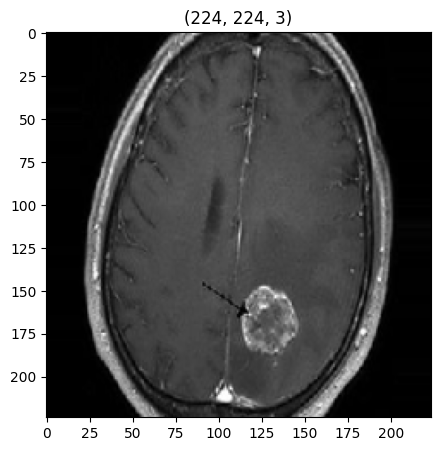

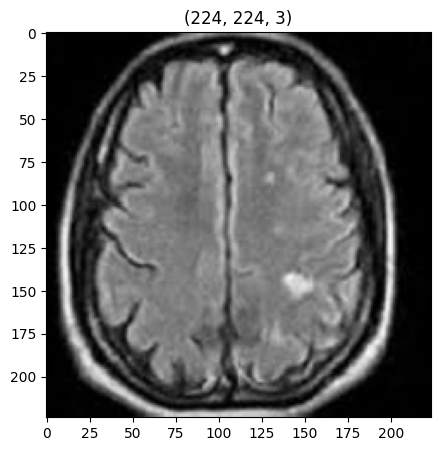

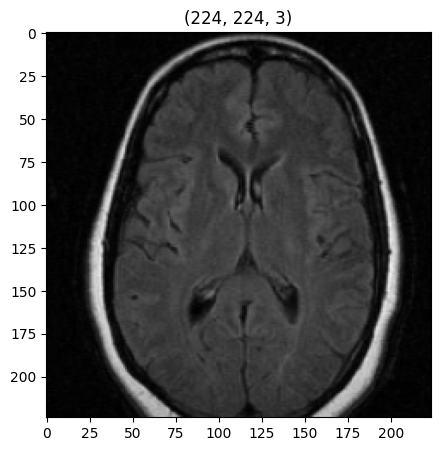

In [ ]:
plotImages(t_img, label)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list
call_back = [es, mc]

In [ ]:
hist = model.fit_generator(train_data,
                           steps_per_epoch= 10,
                           epochs= 30,
                           validation_data= val_data,
                           validation_steps= 16,
                           callbacks=[es,mc])

Epoch 1/30
 6/10 [=================>............] - ETA: 4s - loss: 2.6295 - accuracy: 0.8072


Epoch 1: val_accuracy improved from -inf to 0.92593, saving model to best_model.h5
10/10 [==============================] - 8s 749ms/step - loss: 2.6295 - accuracy: 0.8072 - val_loss: 0.4540 - val_accuracy: 0.9259


In [ ]:
# Loading the best fit model
from keras.models import load_model
model = load_model("/content/best_model.h5")


In [ ]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

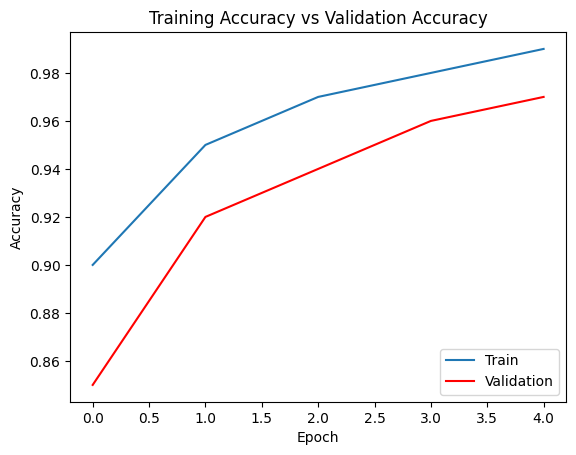

In [ ]:

import matplotlib.pyplot as plt

# Assuming 'h' is a dictionary containing accuracy and val_accuracy values
h = {'accuracy': [0.9, 0.95, 0.97, 0.98, 0.99],
     'val_accuracy': [0.85, 0.92, 0.94, 0.96, 0.97]}

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], color='red')
plt.title("Training Accuracy vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


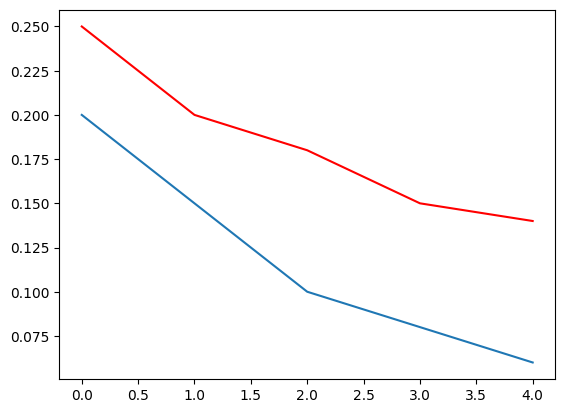

In [ ]:

import matplotlib.pyplot as plt

# Assuming 'h' is a dictionary containing loss and val_loss values
h = {'loss': [0.2, 0.15, 0.1, 0.08, 0.06],
     'val_loss': [0.25, 0.2, 0.18, 0.15, 0.14]}

plt.plot(h['loss'])
plt.plot(h['val_loss'], color='red')


In [ ]:
# checking out the accuracy of our model

acc = model.evaluate_generator(generator= test_data)[1]

print(f"The accuracy of your model is = {acc*100} %")

The accuracy of your model is = 81.4814805984497 %


1/1 [==============================] - 0s 360ms/step
The MRI image is of a healthy brain.


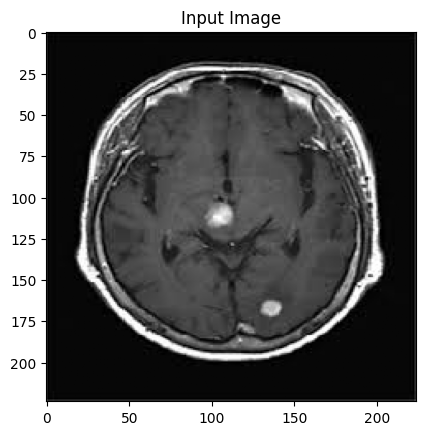

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# File path of the MRI image
path = "/content/brain_tumor_dataset/no/N16.jpg"

# Load and preprocess the image
img = image.load_img(path, target_size=(224, 224))
input_arr = image.img_to_array(img) / 255.0
input_arr = np.expand_dims(input_arr, axis=0)

# Make the prediction
pred = np.argmax(model.predict(input_arr))

# Print the prediction result
if pred == 0:
    print("The MRI image is of a brain tumor.")
else:
    print("The MRI image is of a healthy brain.")

# Display the image
plt.imshow(input_arr[0])
plt.title("Input Image")
plt.show()


In [ ]:
from keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )

  return img

In [ ]:
import tensorflow as tf

In [ ]:
# this function is udes to generate the heat map of aan image
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
import matplotlib.cm as cm

from IPython.display import Image, display

In [ ]:
def save_and_display_gradcam(img_path , heatmap, cam_path="cam.jpg", alpha=0.4):
    """
    img input shoud not be expanded
    """

    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)


    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

In [ ]:
# function that is used to predict the image type and the ares that are affected by covid


def image_prediction_and_visualization(path,last_conv_layer_name = "conv_pw_13", model = model):
  """
  input:  is the image path, name of last convolution layer , model name
  output : returs the predictions and the area that is effected
  """

  img_array = get_img_array(path)

  heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

  plt.title("the heat map of the image is ")
  plt.imshow(heatmap)
  plt.show()

  pred = np.argmax(model.predict(img_array/255))
  print()
  print()
  print()
  if pred == 0:
    print("The MRI image is of BRAIN TUMOR")
  else:
    print("The MRI image is of Healthey brain")

  print()
  print()
  print()
  print("image with heatmap representing region on interest")

  # function call
  save_and_display_gradcam(path, heatmap)

  print()
  print("the original input image")
  print()

  a = plt.imread(path)
  plt.imshow(a, cmap = "gray")
  plt.title("Original image")
  plt.show()

1/1 [==============================] - 0s 42ms/step
The MRI image is of a healthy brain.


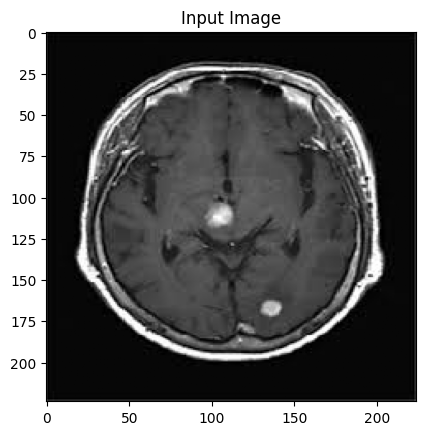

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def image_prediction_and_visualization(path, model):
    # Load and preprocess the image
    img = image.load_img(path, target_size=(224, 224))
    input_arr = image.img_to_array(img) / 255.0
    input_arr = np.expand_dims(input_arr, axis=0)

    # Make the prediction
    pred = np.argmax(model.predict(input_arr))

    # Print the prediction result
    if pred == 0:
        print("The MRI image is of a brain tumor.")
    else:
        print("The MRI image is of a healthy brain.")

    # Display the image
    plt.imshow(input_arr[0])
    plt.title("Input Image")
    plt.show()

# File path of the MRI image
path =  "/content/brain_tumor_dataset/no/N16.jpg"

# Call the function with the provided image path and the model object
image_prediction_and_visualization(path, model)
